## 6. Files and OS

Issues:

 * Reading, writing files.  Searching for files. 
 * Dictionaries to keep track of data. 
 

In [10]:
## lets apply dictionaries to file IO

import os as os
print("filesystem root: ", os.listdir("/")) ## lists all the directories in PWD ##
os.uname() ## OS information
os.getcwd() ## lists the current working directory
os.listdir('.') ## lists all files and directories in '.' (here)
os.path.abspath('.') ## lists the absolute path (from root) to this directory

filesystem root:  ['bin', 'boot', 'dev', 'etc', 'home', 'lib', 'lib64', 'media', 'mnt', 'opt', 'proc', 'root', 'run', 'sbin', 'srv', 'sys', 'tmp', 'usr', 'var', 'user', 'data', '.dockerenv', 'node_modules']


'/home/user/mp248/notes'

In [11]:
os.listdir('/') ## Lists all the directories in '/' (root) ##

['bin',
 'boot',
 'dev',
 'etc',
 'home',
 'lib',
 'lib64',
 'media',
 'mnt',
 'opt',
 'proc',
 'root',
 'run',
 'sbin',
 'srv',
 'sys',
 'tmp',
 'usr',
 'var',
 'user',
 'data',
 '.dockerenv',
 'node_modules']

In [12]:
os.path.isfile("/run")

False

In [13]:
os.path.isdir("/run")

True

In [16]:
with os.scandir('/') as it:
    for entry in it:
        print(type(entry), entry, entry.is_dir())

<class 'posix.DirEntry'> <DirEntry 'bin'> True
<class 'posix.DirEntry'> <DirEntry 'boot'> True
<class 'posix.DirEntry'> <DirEntry 'dev'> True
<class 'posix.DirEntry'> <DirEntry 'etc'> True
<class 'posix.DirEntry'> <DirEntry 'home'> True
<class 'posix.DirEntry'> <DirEntry 'lib'> True
<class 'posix.DirEntry'> <DirEntry 'lib64'> True
<class 'posix.DirEntry'> <DirEntry 'media'> True
<class 'posix.DirEntry'> <DirEntry 'mnt'> True
<class 'posix.DirEntry'> <DirEntry 'opt'> True
<class 'posix.DirEntry'> <DirEntry 'proc'> True
<class 'posix.DirEntry'> <DirEntry 'root'> True
<class 'posix.DirEntry'> <DirEntry 'run'> True
<class 'posix.DirEntry'> <DirEntry 'sbin'> True
<class 'posix.DirEntry'> <DirEntry 'srv'> True
<class 'posix.DirEntry'> <DirEntry 'sys'> True
<class 'posix.DirEntry'> <DirEntry 'tmp'> True
<class 'posix.DirEntry'> <DirEntry 'usr'> True
<class 'posix.DirEntry'> <DirEntry 'var'> True
<class 'posix.DirEntry'> <DirEntry 'user'> True
<class 'posix.DirEntry'> <DirEntry 'data'> True
<c

In [17]:
for x in os.listdir():
    print(type(x), x);

<class 'str'> 3. Introduction to Python programming.ipynb
<class 'str'> 4. Python plotting, interpolation, units, 2D arrays.ipynb
<class 'str'> 0. Introduction.ipynb
<class 'str'> 2. Intro Git.ipynb
<class 'str'> images
<class 'str'> .ipynb_checkpoints
<class 'str'> 6. Files and OS.ipynb
<class 'str'> .git
<class 'str'> README.md
<class 'str'> 1. Command line interface - Linux, Unix, GNU.ipynb
<class 'str'> 5. Numerical integration and differentiation.ipynb
<class 'str'> examples
<class 'str'> Labs
<class 'str'> Quizzes_Assignments_Exams


In [18]:
for dirName, subdirList, fileList in os.walk('.'):
    print("Dir: ", dirName)
    pad = (" "*dirName.count('/'))
    for fname in fileList:
        print(pad, fname)
    #print("Subdirs: ", subdirList)

Dir:  .
 3. Introduction to Python programming.ipynb
 4. Python plotting, interpolation, units, 2D arrays.ipynb
 0. Introduction.ipynb
 2. Intro Git.ipynb
 6. Files and OS.ipynb
 README.md
 1. Command line interface - Linux, Unix, GNU.ipynb
 5. Numerical integration and differentiation.ipynb
Dir:  ./images
  secondplot.png
  quarter.png
  ResistorCircuit.jpg
  firstplot.png
  fig_circle_pi.jpg
Dir:  ./.ipynb_checkpoints
  6. Files and OS-checkpoint.ipynb
Dir:  ./.git
  ORIG_HEAD
  COMMIT_EDITMSG
  HEAD
  packed-refs
  index
  description
  config
  FETCH_HEAD
Dir:  ./.git/refs
Dir:  ./.git/refs/tags
Dir:  ./.git/refs/remotes
Dir:  ./.git/refs/remotes/origin
     HEAD
     master
Dir:  ./.git/refs/heads
    master
Dir:  ./.git/hooks
   pre-receive.sample
   pre-applypatch.sample
   pre-rebase.sample
   fsmonitor-watchman.sample
   prepare-commit-msg.sample
   commit-msg.sample
   pre-commit.sample
   post-update.sample
   applypatch-msg.sample
   pre-push.sample
   update.sample
Dir:  .

In [17]:
print("blah "*3)

blah blah blah 


### Let's build some code keep track of all different file sizes in a directory tree.
#### We will write a procedure that will comb through a directory tree, and count files by their size (and convert that size to kB's) The return value will be a dictionary (file size in kB, number of files of that type)


In [30]:
## run through directory tree, and count files by size. 
## os.stat(<file>).st_size gives you a value in bytes. ******
import collections as co
scount = co.defaultdict(int)
for dirName, subdirList, fileList in os.walk('/'):
    for fname in fileList:
        ## gives us the fully-qualified filename
        fn = os.path.join(dirName, fname)
        if dirName == '/proc': ## Proc has some issues when counting file sizes ##
            subdirList[:] = []
            continue
        if os.path.islink(fn)==False:
            scount[os.stat(fn).st_size // 1024] += 1 ## Integer dividing by 1024 to get size in kB's ##

In [31]:
import operator as op
## how do you sort dictionaries? 
## convert dict to a list with items() command
sortcount = sorted( scount.items(), key=op.itemgetter(1) )

In [32]:
print(sortcount[-10:])

[(9, 2450), (8, 2679), (7, 3099), (6, 4201), (5, 4957), (3, 8376), (2, 12175), (1, 21555), (0, 56849), (4, 64695)]


In [35]:
import matplotlib.pyplot as plt

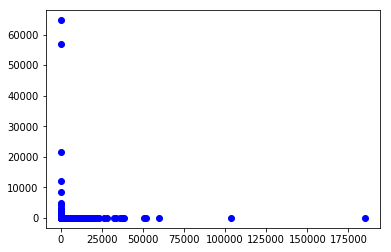

In [36]:
X = [a[0] for a in sortcount]
## list comprehension
Y = [a[1] for a in sortcount]
plt.plot(X,Y, 'bo')

## Experiment:

Use dictionaries to compares works of literature. 

Project Gutenberg webpage w/works of Shakespere. 

Build dictionaries that keep track of words used in texts. 

Can compare two books, for novel word usage. 

Count word usage, how often is a word used? 

In [34]:
import requests as req

In [35]:
hamstr = req.get('https://www.gutenberg.org/ebooks/2265.txt.utf-8').content

In [36]:
romstr = req.get('https://www.gutenberg.org/ebooks/1777.txt.utf-8').content

In [37]:
print(type(romstr))

<class 'bytes'>


In [38]:
print(romstr[0:10])

b'\xef\xbb\xbf\r\nThis '


In [51]:
## this is a unicode file
S = hamstr.decode("utf-8")
R = romstr.decode("utf-8")

In [40]:
print(type(S))

<class 'str'>


In [41]:
S[0:40]

"\ufeff***The Project Gutenberg's Etext of Sha"

In [52]:
import string
print(string.punctuation)
rPun = string.punctuation.replace("'", '')
print(rPun)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~


In [54]:
## sets are like lists but have two main differences:
## (1) they are unordered
## (2) an object can be contained only once 
def setOfWords(strname):
    ## empty set
    bset = set()
    ## will be a list of every object in strname
    ## once split along the spaces
    strname = strname.replace('\r\n', ' ')
    strname = strname.lower()
    for c in rPun:
        strname = strname.replace(c, ' ')
    ln = strname.split(' ')
    for w in ln:
        if w!='':
            bset.add(w)
    return(bset)

hamwords = setOfWords(S)
romwords = setOfWords(R)
print(len(hamwords), len(romwords))
## TODO: deal with the \r\n issue.  Deal with caps. 

5344 4148


In [49]:
print(hamwords)

{'your', 'moneth', 'poem', 'playd', 'gouerne', 'imediate', 'currently', 'mentioned', 'imminent', 'table', 're', 'catch', 'bap', 'guarded', 'leuell', 'reuerted', 'yeelding', 'asleepe', 'counter', 'express', 'greenly', 'constructed', "abus'd", 'flesh', 'benetted', 'wherein', 'bulwarke', 'bewept', 'coozenage', 'had', 'tender', 'plye', 'simple', 'declension', "for's", 'iustice', 'moult', 'young', 'battalians', 'clad', 'liquid', 'damned', 'ill', "finger'd", 'priuy', 'references', 'mother', 'say', 'swathing', 'browser', 'sea', 'per', "would'st", 'iudgement', 'woodcocks', "suck'd", 'mans', 'good', 'armie', 'water', 'folke', 'cease', 'doubt', 'neptunes', 'became', 'binary', 'entertainment', "ouerlook'd", 'swift', 'demand', 'cerments', 'auspicious', 'snatches', 'necessary', 'throw', 'titles', 'excrements', 'stated', 'ghost', 'kissing', 'seal', 'marching', 'haste', 'ranke', 'could', 'axe', 'total', 'listing', 'seeme', 'fardles', 'buttons', 'trespasse', 'above', 'betoken', 'dare', 'vndertakings',

In [57]:
## construct a set of words that are novel to one book
hamnov = hamwords.difference(romwords)
romnov = romwords.difference(hamwords)
print(len(hamnov), len(romnov))

3714 2518


In [59]:
## build a function to count word frequency
## use R and S as input
def countWords(strname):
    ## empty defaultdict
    ct = co.defaultdict(int)
    ## will be a list of every object in strname
    ## once split along the spaces
    strname = strname.replace('\r\n', ' ')
    strname = strname.lower()
    for c in rPun:
        strname = strname.replace(c, ' ')
    ln = strname.split(' ')
    for w in ln:
        if w!='':
            ct[w]+=1
    return(ct)

romct = countWords(R)
hamct = countWords(S)

In [62]:
romsort = sorted( romct.items(), key=op.itemgetter(1) )
hamsort = sorted( hamct.items(), key=op.itemgetter(1) ) 

In [63]:
print(romsort[0:10])

[('\ufeff', 1), ('presented', 1), ('cooperation', 1), ('cdroms', 1), ('releases', 1), ('placed', 1), ('has', 1), ('implications', 1), ('cooperate', 1), ('reading', 1)]


In [64]:
print(romsort[-10:])

[('in', 329), ('my', 359), ('that', 365), ('is', 384), ('of', 474), ('a', 478), ('i', 575), ('to', 612), ('the', 748), ('and', 780)]


In [67]:
## builds a list of pairs of (x,y) where x is a word novel to Romeo&Juliet
### y is romct[x]. 
romnovct = [(x, romct[x]) for x in romnov]
romnovsort = sorted( romnovct, key=op.itemgetter(1) )

In [68]:
print(romnovsort[-10:])

[('juliet', 59), ('mer', 62), ('ben', 64), ("i'll", 71), ('friar', 92), ('jul', 117), ('romeo', 136), ('love', 139), ('nurse', 150), ('rom', 163)]


In [ ]:
## make a stand-alone python program
## one you can execute from the command prompt
## write code executable from the command prompt will output
## the 10 most common words from a book given by a http address.(webpage)

## python3 wordct.py [address]
## format we would call it with

import sys

import string
print(string.punctuation)
rPun = string.punctuation.replace("'", '')
print(rPun)

def countWords(strname):
    ## empty defaultdict
    ct = co.defaultdict(int)
    ## will be a list of every object in strname
    ## once split along the spaces
    strname = strname.replace('\r\n', ' ')
    strname = strname.lower()
    for c in rPun:
        strname = strname.replace(c, ' ')
    ln = strname.split(' ')
    for w in ln:
        if w!='':
            ct[w]+=1
    return(ct)

def countWPW(wpstring):
    romstr = req.get(wpstring).content.decode("utf-8")
    return(countWords(romstr))

## argv variable list of all the strings on the command line
print(sys.argv)